In [46]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '\\Users\\lohzy\\Desktop\\CV Lab\\segmentation_models')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio
import torchvision

from PIL import Image

DATA_DIR = './train_test_val_data'

train_images = os.listdir(os.path.join(DATA_DIR,'train_original'))
print(len(train_images))

5545


In [47]:
# Generate segmented images
df_train = pd.read_csv('train.csv')
df_train['Image'] = df_train.Image_Label.apply(lambda x:x.split('_')[0])
df_train['Class'] = df_train.Image_Label.apply(lambda x:x.split('_')[1])
df_train = df_train.set_index('Image_Label')
df_train.head()

,EncodedPixels,Image,Class
Image_Label,,,
0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
0011165.jpg_Gravel,NaN,0011165.jpg,Gravel
0011165.jpg_Sugar,NaN,0011165.jpg,Sugar
002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [48]:
def rle_decode(mask_rle, shape=(1400, 2100)):
    '''
    mask_rle: run-length as string formatted (start length)
    shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')  # Needed to align to RLE direction

In [49]:
data_transform = torchvision.transforms.Compose([
    torchvision.transforms.CenterCrop(1400),
    torchvision.transforms.Resize((320,320))
    ])

In [50]:
class_name = 'Fish'

for img_name in train_images:
    image_index = img_name + '_' + class_name
    if pd.notnull(df_train.loc[image_index, 'EncodedPixels']):
        output_file_name = os.path.join(DATA_DIR,'train',img_name)
        output_file_segment_name = os.path.join(DATA_DIR,'train_segment',img_name)
    
        mask_rle = df_train.loc[image_index, 'EncodedPixels']
        segmentation = rle_decode(mask_rle)
        segmentation = data_transform(Image.fromarray(segmentation))
        imageio.imwrite(output_file_segment_name, segmentation)
        
        img = Image.open(os.path.join(DATA_DIR,'train_original',img_name))
        imageio.imwrite(output_file_name, data_transform(img))

In [57]:
train_segment_images = os.listdir(os.path.join(DATA_DIR,'train_segment'))
train_images = os.listdir(os.path.join(DATA_DIR,'train'))
assert len(train_segment_images) == len(train_images)
assert (pd.Series(train_segment_images).sort_values() == pd.Series(train_images).sort_values()).sum() == len(train_segment_images)

In [58]:
# Move Some Files over to validation
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'train_segment')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'val_segment')

In [63]:
train_images = os.listdir(x_train_dir)
val_image_names = np.random.choice(train_images, int(0.08*len(train_images)))
for image_name in val_image_names:
    os.replace(os.path.join(x_train_dir,image_name),os.path.join(x_valid_dir,image_name))
    os.replace(os.path.join(y_train_dir,image_name),os.path.join(y_valid_dir,image_name))

FileNotFoundError: [WinError 2] The system cannot find the file specified: './train_test_val_data\\train\\54488de.jpg' -> './train_test_val_data\\val\\54488de.jpg'

In [18]:
for image_name in val_image_names:
    if os.path.exists(os.path.join(x_train_dir,image_name)) == False:
        print(image_name)

444ac39.jpg
db6052a.jpg
4670cff.jpg
53beafa.jpg
8d7e8b1.jpg
9cbf068.jpg
0556b64.jpg
eea6e4c.jpg
5b5b88f.jpg
2f88878.jpg
9792df9.jpg
fa645da.jpg
930a44b.jpg
065623d.jpg
bd624da.jpg
cc995fc.jpg
15b932e.jpg
ee09289.jpg
c6e5c16.jpg
6dd8e81.jpg
4aa465b.jpg
f5bb106.jpg
f102963.jpg
7ef40fc.jpg
920767b.jpg
f199b1e.jpg
cd83e4b.jpg
cd83e4b.jpg
0556b64.jpg
6dd8e81.jpg
53beafa.jpg
bd624da.jpg


In [70]:
np.unique(mask,return_counts=True)

(array([0, 1, 2], dtype=uint8), array([83944, 17976,   480], dtype=int64))

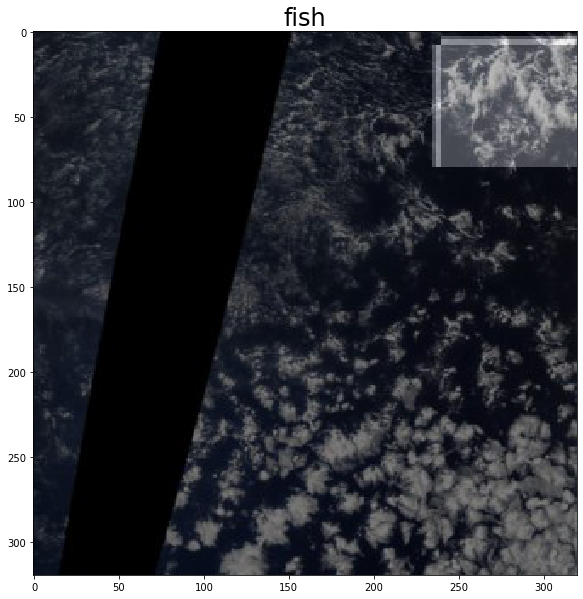

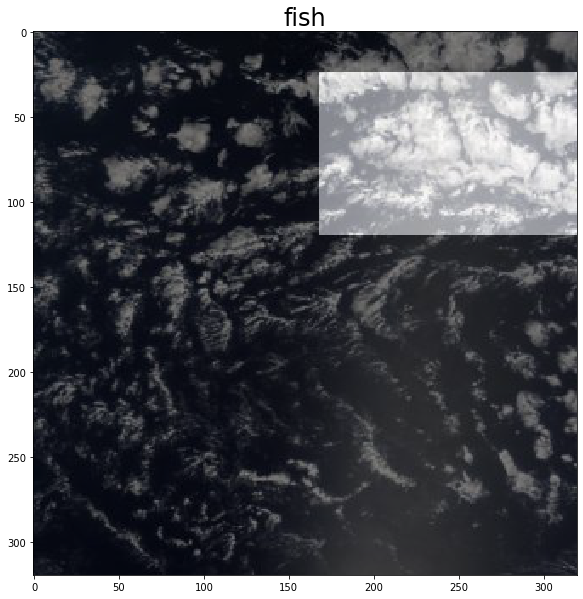

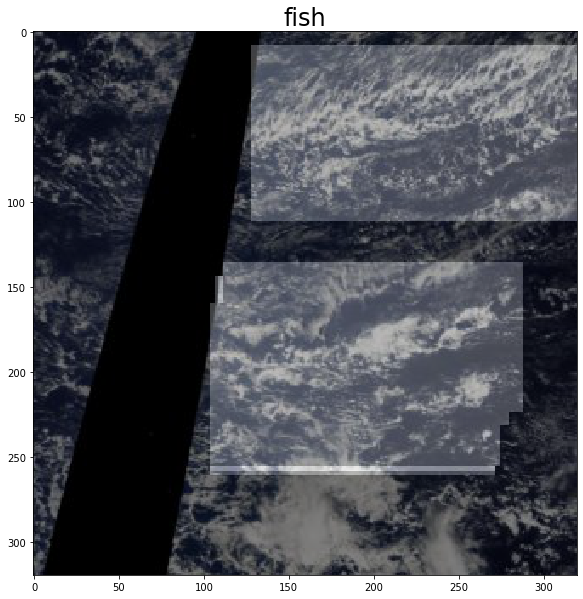

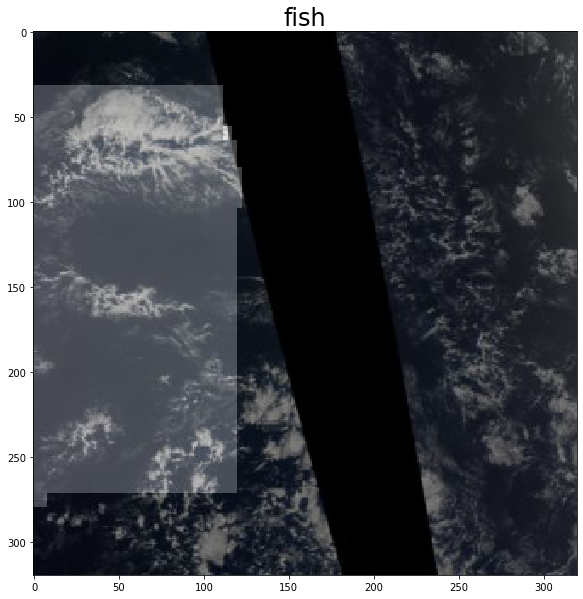

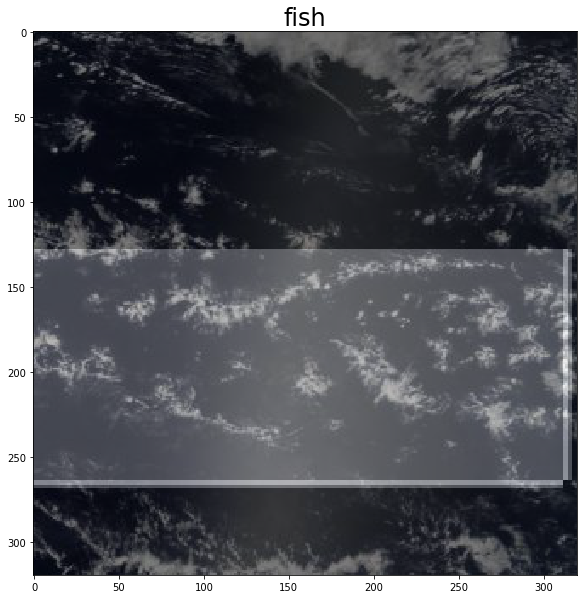

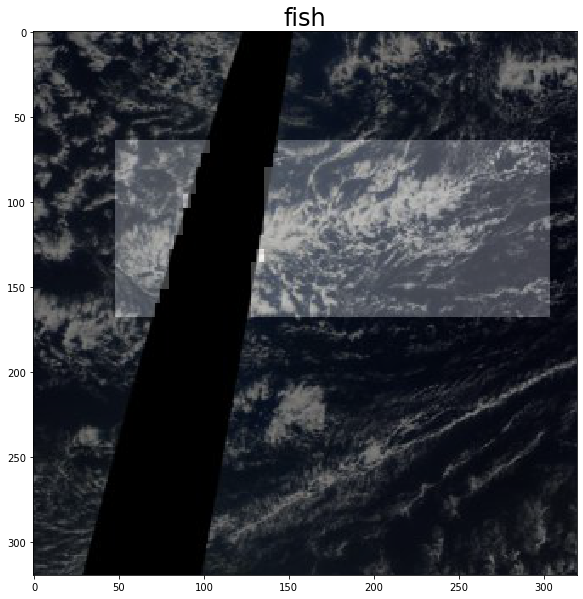

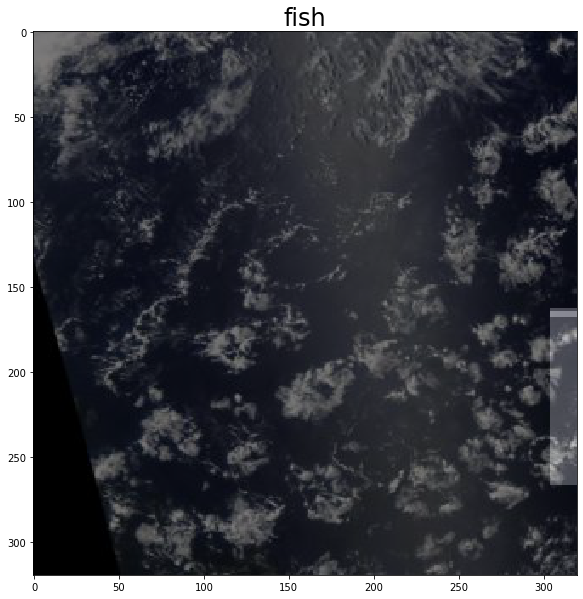

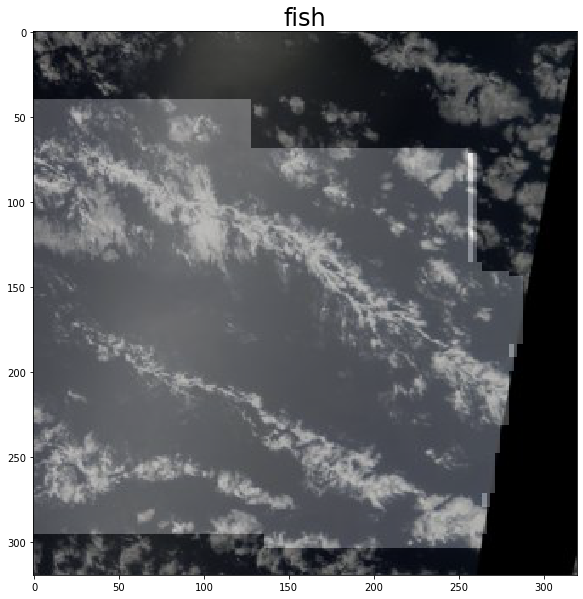

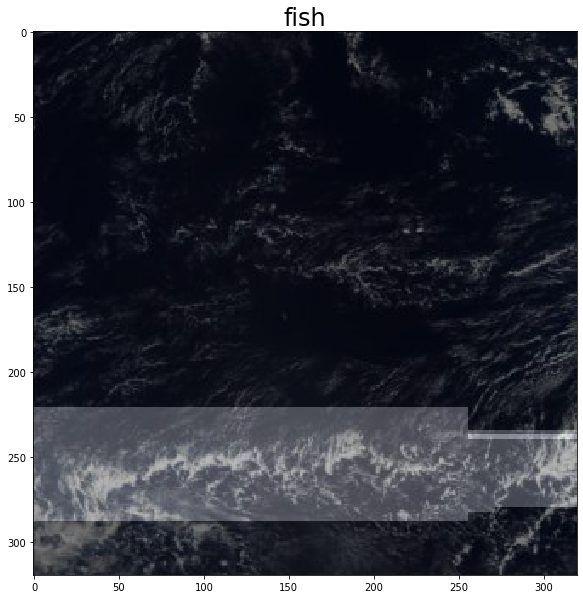

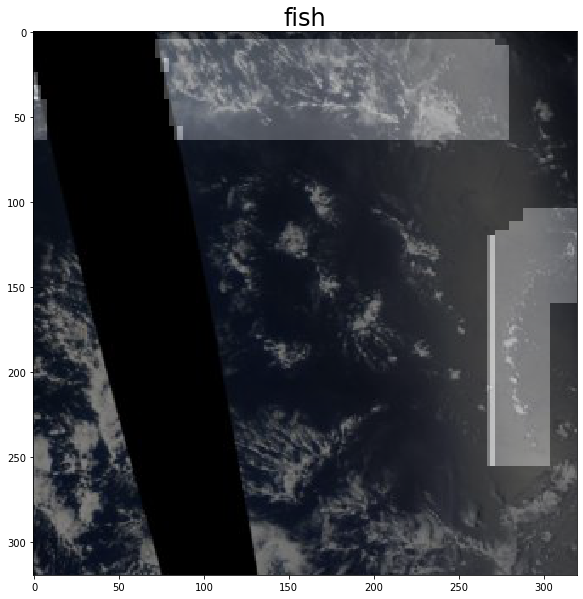

In [67]:
train_images = os.listdir(x_train_dir)
for i in range(10):
    for image_name in np.random.choice(train_images,1):
        img = Image.open(os.path.join(x_train_dir,image_name))
        mask = Image.open(os.path.join(y_train_dir,image_name))

        plt.figure(figsize=(15, 10))
        plt.imshow(img)
        plt.imshow(mask, alpha=0.5, cmap='gray')
        plt.title('fish', fontsize=24)
        plt.show()

In [13]:
val_image_names

array(['0a515e3.jpg', 'ff8401a.jpg', '77d4125.jpg', 'e32196c.jpg',
       '73f91d5.jpg', 'c3ecc72.jpg', 'a381186.jpg', '914213a.jpg',
       '4931345.jpg', 'd82aebf.jpg', 'a6ac926.jpg', '8d5f7a9.jpg',
       '04d5fe8.jpg', 'd7ddcb8.jpg', 'c495347.jpg', 'b07ed28.jpg',
       'e1e2bfe.jpg', '4795dc4.jpg', 'a456155.jpg', 'a9077ec.jpg',
       'b90650d.jpg', '988f773.jpg', '2034eb0.jpg', '474a043.jpg',
       '5ca94d8.jpg', '04a4276.jpg', 'df1ecdf.jpg', '9adb9ca.jpg',
       '4ef3b9a.jpg', '37e8349.jpg', 'c73ed01.jpg', '5122a3d.jpg',
       '80ec07d.jpg', 'd6e82c0.jpg', 'fc5ccee.jpg', '63b45f9.jpg',
       'ee9d20a.jpg', '8e259ea.jpg', '9b0919e.jpg', '6ce2c50.jpg',
       '60b6d2c.jpg', 'a543bbc.jpg', '24afc43.jpg', '6708d0b.jpg',
       'ddff8a5.jpg', '7610dd9.jpg', '839090a.jpg', '6d333f7.jpg',
       '6e0858d.jpg', 'f199b1e.jpg', '8553a23.jpg', 'b40a361.jpg',
       '68afd03.jpg', '8bacf39.jpg', '9a4f665.jpg', '23d1c12.jpg',
       'c92f585.jpg', '5d27b80.jpg', '106b15a.jpg', '836ced3.j